In [4]:
import json
import pandas as pd
import sqlite3
from sqlalchemy import create_engine
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
with open('population.json', 'r') as f:
    data = json.load(f)


N_data = pd.json_normalize(data, sep='_')  # normalize JSON

# Store data into an SQLite database using SQLAlchemy
engine = create_engine('sqlite:///mydatabase.db')  

# Create a connection to the database
conn = sqlite3.connect('mydatabase.db')

# Store the DataFrame into the database 
N_data.to_sql('data_table', conn, if_exists='replace', index=False)

# Close the connection
conn.close()

#load data from the SQLite database into pandas DataFrame
conn = sqlite3.connect('mydatabase.db')


df = pd.read_sql('SELECT * FROM data_table', conn)


conn.close()


print(df.head())  


  Local Authority  Scenario  Age year_2020 year_2021 year_2022 year_2023  \
0          Carlow  Baseline    0       766       756       747       741   
1           Cavan  Baseline    0       988       970       953       938   
2           Clare  Baseline    0     1,335     1,310     1,290     1,274   
3       Cork City  Baseline    0     2,403     2,370     2,337     2,308   
4     Cork County  Baseline    0     4,316     4,258     4,199     4,146   

  year_2024 year_2025 year_2026  ... year_2031 year_2032 year_2033 year_2034  \
0       735       733       732  ...       764       780       797       812   
1       925       914       909  ...       963       993     1,022     1,052   
2     1,267     1,264     1,269  ...     1,376     1,417     1,455     1,489   
3     2,282     2,263     2,251  ...     2,263     2,286     2,307     2,325   
4     4,100     4,066     4,043  ...     4,065     4,107     4,144     4,177   

  year_2035 year_2036 year_2037 year_2038 year_2039 year_2040 

In [9]:
df

,Local Authority,Scenario,Age,year_2020,year_2021,year_2022,year_2023,year_2024,year_2025,year_2026,...,year_2031,year_2032,year_2033,year_2034,year_2035,year_2036,year_2037,year_2038,year_2039,year_2040
0,Carlow,Baseline,0,766,756,747,741,735,733,732,...,764,780,797,812,828,842,856,869,880,890
1,Cavan,Baseline,0,988,970,953,938,925,914,909,...,963,993,"1,022","1,052","1,077","1,101","1,122","1,138","1,151","1,161"
2,Clare,Baseline,0,"1,335","1,310","1,290","1,274","1,267","1,264","1,269",...,"1,376","1,417","1,455","1,489","1,519","1,545","1,565","1,578","1,588","1,591"
3,Cork City,Baseline,0,"2,403","2,370","2,337","2,308","2,282","2,263","2,251",...,"2,263","2,286","2,307","2,325","2,342","2,357","2,371","2,385","2,399","2,414"
4,Cork County,Baseline,0,"4,316","4,258","4,199","4,146","4,100","4,066","4,043",...,"4,065","4,107","4,144","4,177","4,207","4,234","4,259","4,284","4,309","4,336"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12519,Tipperary,Low migration,100,6,6,7,6,8,7,7,...,12,11,12,13,14,15,15,16,18,19
12520,Waterford,Low migration,100,4,4,4,5,6,5,5,...,7,8,8,9,10,10,11,11,13,12
12521,Westmeath,Low migration,100,2,4,3,4,3,4,4,...,5,5,6,6,7,7,8,8,8,9
12522,Wexford,Low migration,100,6,5,5,5,5,6,7,...,9,9,10,11,11,13,14,15,16,16


In [10]:
#check missing values in case there is one replace with the mean
print(df.isnull().sum())

Local Authority    0
Scenario           0
Age                0
year_2020          0
year_2021          0
year_2022          0
year_2023          0
year_2024          0
year_2025          0
year_2026          0
year_2027          0
year_2028          0
year_2029          0
year_2030          0
year_2031          0
year_2032          0
year_2033          0
year_2034          0
year_2035          0
year_2036          0
year_2037          0
year_2038          0
year_2039          0
year_2040          0
dtype: int64


In [11]:
#check the type of data to make any adjust needed
df.dtypes

Local Authority    object
Scenario           object
Age                 int64
year_2020          object
year_2021          object
year_2022          object
year_2023          object
year_2024          object
year_2025          object
year_2026          object
year_2027          object
year_2028          object
year_2029          object
year_2030          object
year_2031          object
year_2032          object
year_2033          object
year_2034          object
year_2035          object
year_2036          object
year_2037          object
year_2038          object
year_2039          object
year_2040          object
dtype: object

In [14]:
#convert objects to strings this way we can work with the numeric part first deleting the (,) so that we can change this columns to Float
df = df.astype(str)

In [15]:
for col in df.columns[2:25]:
    df[col] = df[col].str.replace(',', '', regex=False).astype(float)




print(df)

      Local Authority       Scenario    Age  year_2020  year_2021  year_2022  \
0              Carlow       Baseline    0.0      766.0      756.0      747.0   
1               Cavan       Baseline    0.0      988.0      970.0      953.0   
2               Clare       Baseline    0.0     1335.0     1310.0     1290.0   
3           Cork City       Baseline    0.0     2403.0     2370.0     2337.0   
4         Cork County       Baseline    0.0     4316.0     4258.0     4199.0   
...               ...            ...    ...        ...        ...        ...   
12519       Tipperary  Low migration  100.0        6.0        6.0        7.0   
12520       Waterford  Low migration  100.0        4.0        4.0        4.0   
12521       Westmeath  Low migration  100.0        2.0        4.0        3.0   
12522         Wexford  Low migration  100.0        6.0        5.0        5.0   
12523         Wicklow  Low migration  100.0        4.0        5.0        5.0   

       year_2023  year_2024  year_2025 

In [16]:
df.dtypes

Local Authority     object
Scenario            object
Age                float64
year_2020          float64
year_2021          float64
year_2022          float64
year_2023          float64
year_2024          float64
year_2025          float64
year_2026          float64
year_2027          float64
year_2028          float64
year_2029          float64
year_2030          float64
year_2031          float64
year_2032          float64
year_2033          float64
year_2034          float64
year_2035          float64
year_2036          float64
year_2037          float64
year_2038          float64
year_2039          float64
year_2040          float64
dtype: object

In [17]:
df_grouped_avg = df.groupby(['Local Authority', 'Scenario']).mean()


print(df_grouped_avg)

                                 Age    year_2020    year_2021    year_2022  \
Local Authority Scenario                                                      
Carlow          50:50 City      50.0   585.732673   591.742574   597.366337   
                Baseline        50.0   590.366337   597.653465   604.445545   
                High migration  50.0   590.415842   597.881188   605.138614   
                Low migration   50.0   588.851485   594.693069   600.227723   
Cavan           50:50 City      50.0   777.316832   783.237624   788.544554   
...                              ...          ...          ...          ...   
Wexford         Low migration   50.0  1530.445545  1540.643564  1550.287129   
Wicklow         50:50 City      50.0  1461.574257  1475.752475  1488.693069   
                Baseline        50.0  1472.920792  1489.841584  1505.415842   
                High migration  50.0  1472.891089  1490.574257  1507.613861   
                Low migration   50.0  1466.930693  1

In [18]:
df_years = df.drop(columns=['Local Authority', 'Scenario'])

# show only numeric columns to create a correlation matrix
print(df_years.head())

   Age  year_2020  year_2021  year_2022  year_2023  year_2024  year_2025  \
0  0.0      766.0      756.0      747.0      741.0      735.0      733.0   
1  0.0      988.0      970.0      953.0      938.0      925.0      914.0   
2  0.0     1335.0     1310.0     1290.0     1274.0     1267.0     1264.0   
3  0.0     2403.0     2370.0     2337.0     2308.0     2282.0     2263.0   
4  0.0     4316.0     4258.0     4199.0     4146.0     4100.0     4066.0   

   year_2026  year_2027  year_2028  ...  year_2031  year_2032  year_2033  \
0      732.0      735.0      741.0  ...      764.0      780.0      797.0   
1      909.0      909.0      915.0  ...      963.0      993.0     1022.0   
2     1269.0     1280.0     1297.0  ...     1376.0     1417.0     1455.0   
3     2251.0     2245.0     2246.0  ...     2263.0     2286.0     2307.0   
4     4043.0     4032.0     4034.0  ...     4065.0     4107.0     4144.0   

   year_2034  year_2035  year_2036  year_2037  year_2038  year_2039  year_2040  
0    

In [19]:
corr_matrix = df_years.corr()

# create and show the correlation matrix
print(corr_matrix)

                Age  year_2020  year_2021  year_2022  year_2023  year_2024  \
Age        1.000000  -0.437352  -0.430017  -0.422453  -0.414791  -0.406956   
year_2020 -0.437352   1.000000   0.997683   0.995318   0.991915   0.987544   
year_2021 -0.430017   0.997683   1.000000   0.997700   0.995347   0.991929   
year_2022 -0.422453   0.995318   0.997700   1.000000   0.997733   0.995373   
year_2023 -0.414791   0.991915   0.995347   0.997733   1.000000   0.997768   
year_2024 -0.406956   0.987544   0.991929   0.995373   0.997768   1.000000   
year_2025 -0.398843   0.983255   0.987519   0.991926   0.995383   0.997781   
year_2026 -0.390719   0.978503   0.983190   0.987501   0.991924   0.995393   
year_2027 -0.382629   0.973256   0.978374   0.983116   0.987486   0.991906   
year_2028 -0.374608   0.967885   0.973085   0.978253   0.983060   0.987455   
year_2029 -0.366717   0.962506   0.967652   0.972921   0.978164   0.982992   
year_2030 -0.358915   0.956561   0.962238   0.967447   0.972804 

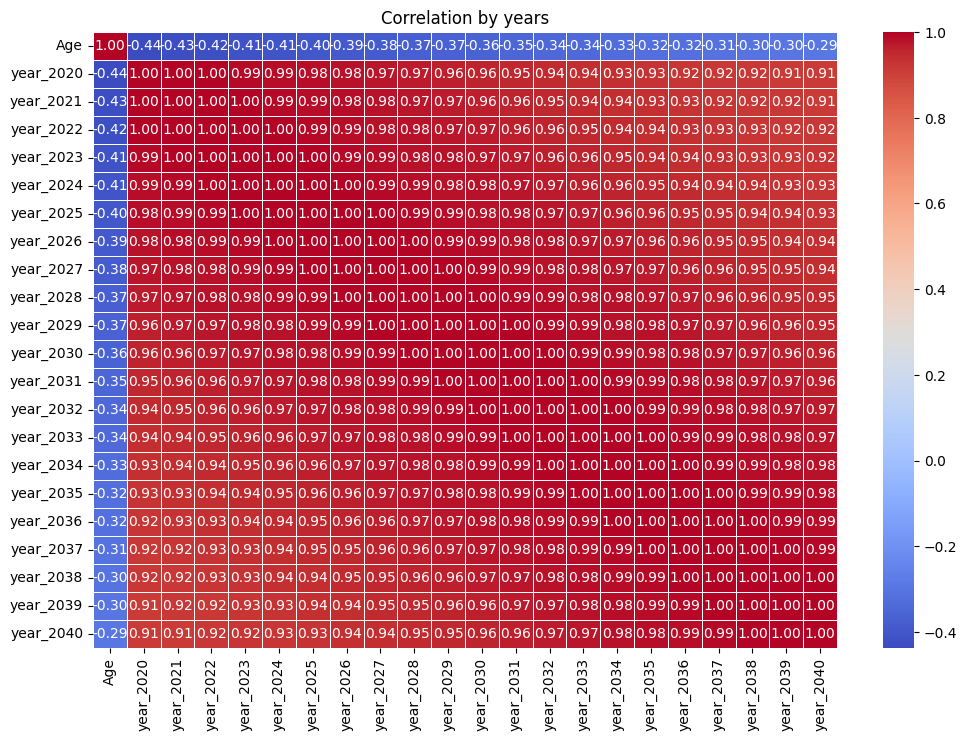

In [20]:
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

plt.title('Correlation by years')
plt.show()


            Scenario  year_2024
27          Baseline     1281.0
58          Baseline     1280.0
89          Baseline     1296.0
120         Baseline     1313.0
151         Baseline     1331.0
...              ...        ...
12396  Low migration       35.0
12427  Low migration       23.0
12458  Low migration       17.0
12489  Low migration       10.0
12520  Low migration        6.0

[404 rows x 2 columns]


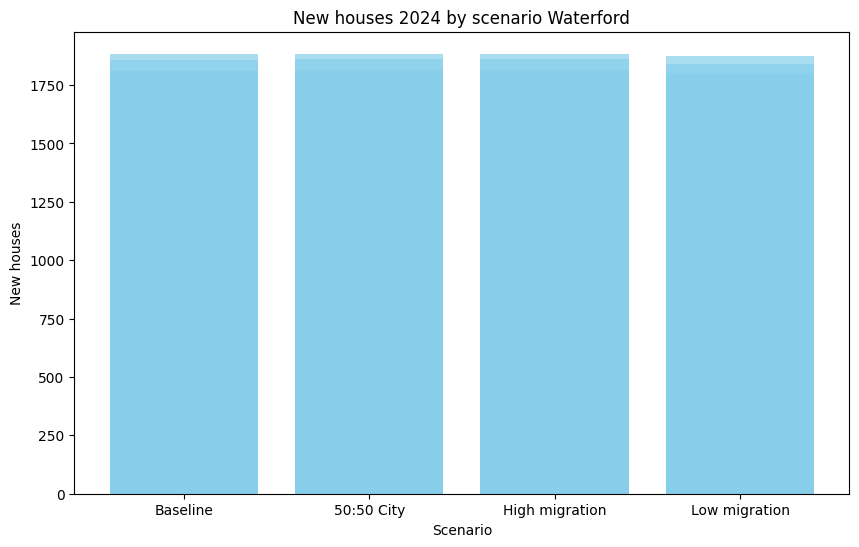

In [21]:
df_waterford_2024 = df[df['Local Authority'] == 'Waterford'][['Scenario', 'year_2024']]


print(df_waterford_2024)


plt.figure(figsize=(10, 6))


plt.bar(df_waterford_2024['Scenario'], df_waterford_2024['year_2024'], color='skyblue', alpha=0.7)


plt.title('Grow Population 2024 by scenario Waterford')
plt.xlabel('Scenario')
plt.ylabel('Population')


plt.show()

            Scenario  year_2030
27          Baseline     1303.0
58          Baseline     1274.0
89          Baseline     1258.0
120         Baseline     1244.0
151         Baseline     1235.0
...              ...        ...
12396  Low migration       57.0
12427  Low migration       40.0
12458  Low migration       26.0
12489  Low migration       16.0
12520  Low migration        7.0

[404 rows x 2 columns]


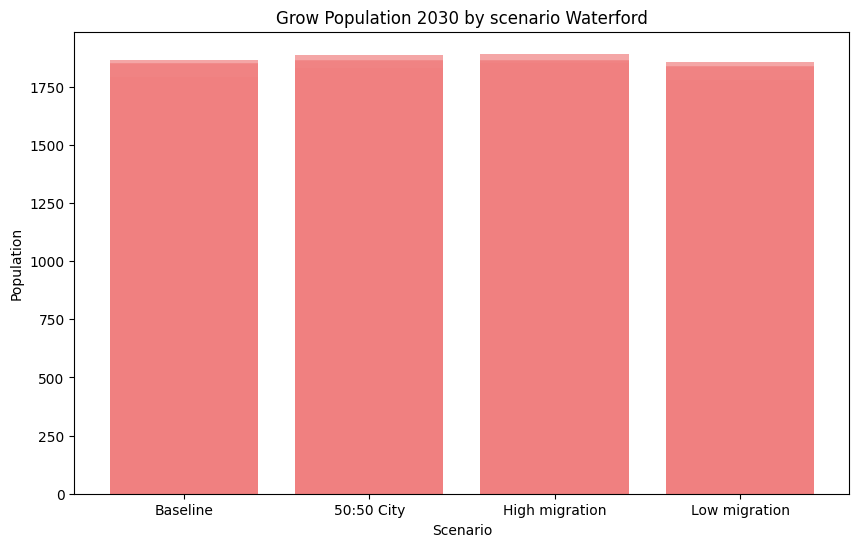

In [25]:
df_waterford_2030 = df[df['Local Authority'] == 'Waterford'][['Scenario', 'year_2030']]


print(df_waterford_2030)


plt.figure(figsize=(10, 6))


plt.bar(df_waterford_2030['Scenario'], df_waterford_2030['year_2030'], color='lightcoral', alpha=0.7)

plt.title('Grow Population 2030 by scenario Waterford')
plt.xlabel('Scenario')
plt.ylabel('Population')


plt.show()

            Scenario  year_2024
3           Baseline     2282.0
34          Baseline     2139.0
65          Baseline     2138.0
96          Baseline     3355.0
127         Baseline     2669.0
...              ...        ...
12372  Low migration       78.0
12403  Low migration       45.0
12434  Low migration       34.0
12465  Low migration       19.0
12496  Low migration        9.0

[404 rows x 2 columns]


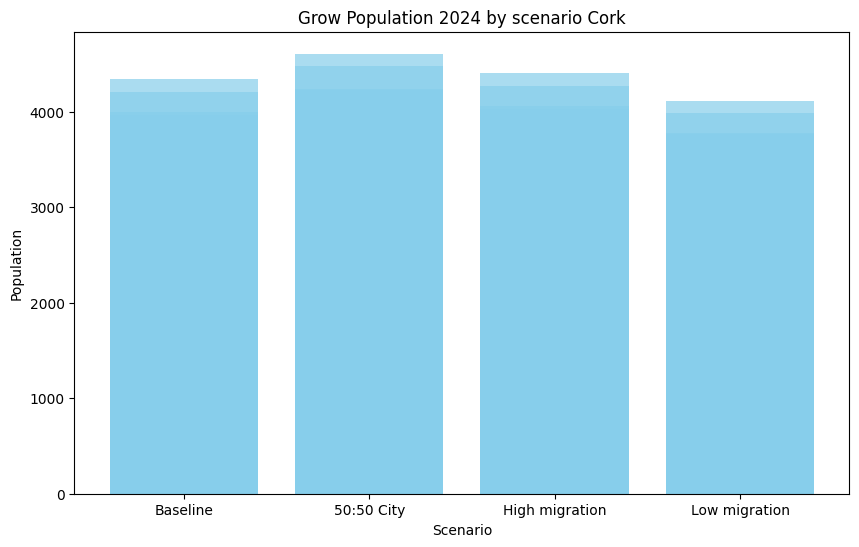

In [23]:
df_c2024 = df[df['Local Authority'] == 'Cork City'][['Scenario', 'year_2024']]


print(df_c2024)


plt.figure(figsize=(10, 6))


plt.bar(df_c2024['Scenario'], df_c2024['year_2024'], color='skyblue', alpha=0.7)


plt.title('Grow Population 2024 by scenario Cork')
plt.xlabel('Scenario')
plt.ylabel('Population')


plt.show()

            Scenario  year_2030
3           Baseline     2256.0
34          Baseline     2084.0
65          Baseline     2050.0
96          Baseline     3164.0
127         Baseline     2484.0
...              ...        ...
12372  Low migration      127.0
12403  Low migration       67.0
12434  Low migration       49.0
12465  Low migration       29.0
12496  Low migration       13.0

[404 rows x 2 columns]


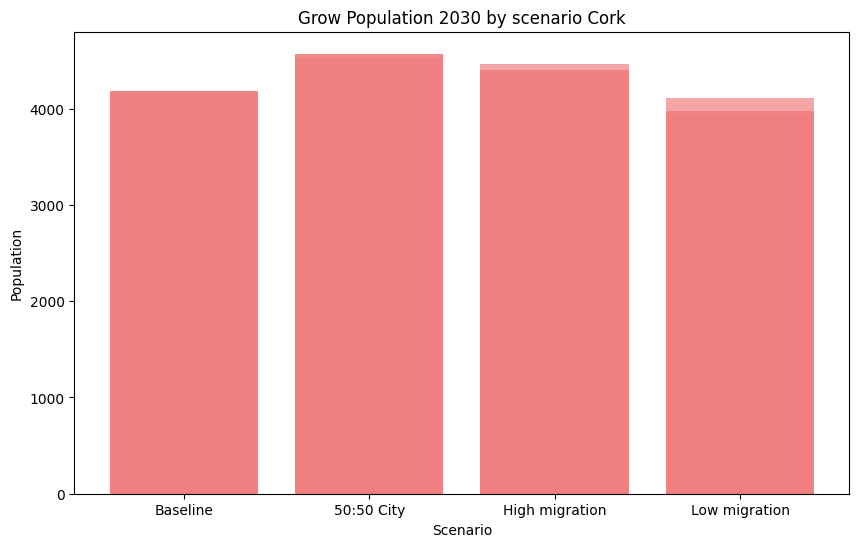

In [24]:
df_c2030 = df[df['Local Authority'] == 'Cork City'][['Scenario', 'year_2030']]


print(df_c2030)


plt.figure(figsize=(10, 6))


plt.bar(df_c2030['Scenario'], df_c2030['year_2030'], color='lightcoral', alpha=0.7)

plt.title('Grow Population 2030 by scenario Cork')
plt.xlabel('Scenario')
plt.ylabel('Population')


plt.show()

In [26]:
df.to_csv('processed_populationdata.csv', index=False)